# SPRACOVANIE OBRAZU

**Autori:** Terézia Sochová & Barbora Nemčeková

**Téma:** Záverečná práca na predmet Umelá Inteligencia 

**Dátum:** 21.11.2022


## Obsah

1. Úvod

2. Vylepšenie obrazu

3. Segmentácia obrazu

4. Rozpoznanie obrazu

5. Záver

## 1. Úvod

Spracovanie obrazu je proces transformovania digitálneho obrazu pomocou určitých operácií s cieľom získania užitočných informácií. Obraz je chápaný ako 2D funkcia **F(x,y)**, kde **x** a **y** sú súradnice pixelu v obraze a funkcia **F** je intenzita daného pixelu. 

Proces spracovania obrazu sa zvyčajne skladá z niekoľkych krokov:
1. získanie obrazu
2. predspracovanie
3. extrakcia vlastností 
4. zaverečné spracovanie
5. vyhodnotenie


Spracovanie obrazu sa využíva napríklad v medicínskych aplikáciach, v analýze satelitných snímkov alebo detekcií tvárí.

![image proccessing](./imgs/image-processing.png "image proccessing")

## **2. Vylepšenie obrazu**

Táto kapitola sa venuje metódam na vylepšenie obrazu. Tieto metódy môžu byť použité samostatne na kozmetické úpravy obrazu alebo ako jedna z hlavných etáp spracovania obrazu. Metódy vylepšenia obrazu spadajú do etapy predspracovania, kedy je obraz pripravovaný na samotné spracovanie. Základné techniky vylepšenia sú: 

1. Prahovanie
2. Redukcia šumu
3. Redukcia zošikmenia
4. Zmena mierky
5. Morfologické operácie

### **Prahovanie**
Prahovanie obrazu je typ segmentácie obrazu, ktorý oddeľuje popredie od pozadia v obraze. Poznáme dva základné druhy prahovania: jednoduché  a adaptivné prahovanie. Pri jednoduchom prahovaní je pre každý pixel použitá rovnaká prahová hodnota. Ak je táto hodnota pixelu menšia ako prah nastaví sa na 0, v opačnom prípade sa nastaví na maximálnu hodnotu. Pri adaptívnom prahovani Algoritmus tu určuje prahovú hodnotu pre pixel na základe malej oblasti okolo neho. Získame tak rôzne prahové hodnoty pre rôzne oblasti toho istého obrázka, čo poskytuje lepšie výsledky pre obrázky s rôznym osvetlením.

Na prahovanie sa používa funkcia *cv.threshold*. 
Prvým argumentom je zdrojový obrázok, ktorým by mal byť obrázok.
Druhým argumentom je prahová hodnota. 
Tretím argumentom je maximálna hodnota pixelu. 
Štvrtým argumentom je typ jednoduhého prahovania. 

OpenCV poskytuje 5 typov prahovania: 

- THRESH_BINARY
- THRESH_BINARY_INV
- THRESH_TRUNC
- THRESH_TOZERO
- THRESH_TOZERO_INV

Jednoduché prahovanie


In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [2]:
cat = skimage.data.cat()
astronaut = skimage.data.astronaut()
finger = skimage.color.rgb2gray(cv2.imread('./imgs/finger.jpg'))

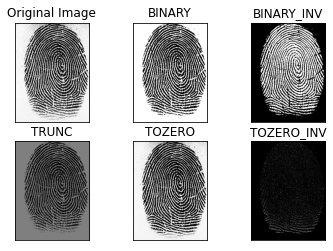

In [4]:

img = cv2.imread('./imgs/finger.jpg',0)


# simple threasholding

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# plotting 
for i in range(6):

    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Adaptívne prahovanie**

Na adaptivne prahovanie sa používa funkcia **cv.adaptiveThreshold**. Okrem uz spominaných vstupných parametrov je adaptívne prahovanie obohatené o
parameter, ktorý rozhoduje o tom, ako sa vypočíta prahová hodnota:

cv.ADAPTIVE_THRESH_MEAN_C: Prahová hodnota je stredná hodnota susednej oblasti mínus konštanta C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: Prahová hodnota je gaussovsky vážený súčet hodnôt okolia mínus konštanta C.

parameter BlockSize určuje veľkosť susednej oblasti a parameter C je konštanta, ktorá sa odpočítava od strednej alebo váženej sumy susedných pixelov.

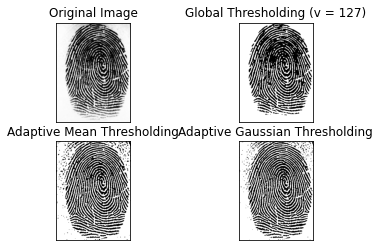

In [5]:
img = cv2.imread('./imgs/finger.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### **Redukcia šumu**

Šum v obraze je náhodná zmena informácie o jase alebo farbe v obraze. Môže byť produkovaný obrazovým snímačom a obvodmi skenera alebo digitálneho fotoaparátu. 
Obrazový šum je nežiadúcim vedľajším produktom snímania obrazu, ktorý zakrýva požadovanú informáciu. 
Jednoduchými slovami ide o, ktoré chceme odstrániť a tým zvýšiť kvalitu obrazu. Odstránenie šumu sa rovnako ako prahovanie použivá v predspracovaní obrazu.

Existujú rôzne spôsoby a metódy odstránenia šumu z obrazu. Táto časť je zameraná na Non-Local Means Denoising metódy na odstránenie šumu. 
Rovnako ako aj v ďalších príkladoch budeme pracovať s openCV knižnicou, kedže chceme zachovať konzistenciu v celom procese predspracovania obrazu.  

Šum sa vo všeobecnosti považuje za náhodnú premennú s nulovým priemerom. Uvažujme pixel so šumom, p = p0 + n, kde p0 je skutočná hodnota pixelu a n je šum v tomto pixeli. 
Môžete zobrať veľké množstvo rovnakých pixelov z rôznych obrázov a vypočítať ich priemer. V ideálnom prípade by ste mali dostať p = p0.


cv2.fastNlMeansDenoising() - pracuje s jedným obrazom v odtieňoch šedej
cv2.fastNlMeansDenoisingColored() - pracuje s farbeným obrazom.
cv2.fastNlMeansDenoisingMulti() - pracuje so sekvenciou obrázov zachytených v krátkom časovom úseku (obrázky v odtieňoch šedej)
cv2.fastNlMeansDenoisingColoredMulti() - pracuje so sekvencoiu farebných obrazov.

Spoločné argumenty pre funkcie:
h : parameter rozhodujúci o sile filtra. Vyššia hodnota h odstraňuje šum lepšie, ale odstraňuje aj detaily obrazu. napr: 10
hForColorComponents : rovnaké ako h, ale pre farebné obrázky. Zvyčajne rovnaké ako h
templateWindowSize : Veľkosť okna - nepárne čislo. (odporúčané 7)
searchWindowSize : Veľkosť okna - nepárne číslo. (odporúčané 21)

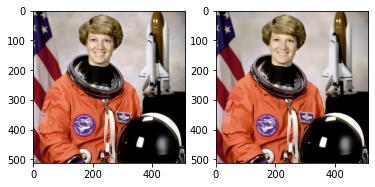

In [6]:
dst = cv2.fastNlMeansDenoisingColored(astronaut,None,10,10,7,21)

plt.subplot(121),plt.imshow(astronaut)
plt.subplot(122),plt.imshow(dst)
plt.show()

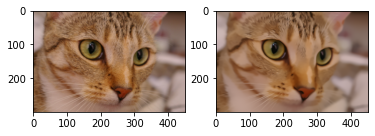

In [7]:
dst = cv2.fastNlMeansDenoising(cat,None,10,7,21)

plt.subplot(121),plt.imshow(cat)
plt.subplot(122),plt.imshow(dst)
plt.show()

### **Morfologické operácie**

Morfologické operácie sú jedny z techník spracovania digitálneho obrazu. 
Používajú sa hlavne pri predspracovaní obrázov na odstránenie šumu a zjednodušenie tvaru.
Najčastejšie sú používané na binárne obrazy, avšak je možné použiť ich aj na šedotónové. 
Medzi morfologické operácie patrí dilatácia, erózia, otvorenie a uzavretie.
Robnako ako predchadzajúcich príkladoch sme aj tu použily knižnicu openCV.
V nasledujúcich operáciách vždy potrebujeme dva vstupy. prvý je originálny obraz a druhy takzvaný kernel

**Erózia**
Pri erózii sú pixely blízko okraja odstránenie v závislosti od veľkosti jadra. Takže hrúbka alebo veľkosť objektu v popredí sa zmenšuje. Ide o takzvané ztenšovanie. 
Je to užitočné na odstránenie malých bielych šumov, oddelenie dvoch spojených objektov atď.


**Dilácia**
Dilácia je pravý opak erózie. Zväčšuje veľkosť objektu v popredí. 
Normálne, v prípadoch ako je odstraňovanie šumu, po erózii nasleduje dilácia.
Použiva sa aj pri spájaní časti objektu, ktoré boli naríklad zlým nasnímaním oddelené.


**Otvorenie**
Otvorenie je kombináciou morfologický operácii dilatácie a erózie. Využíva sa tu skutočnosť že tieto operácie nie sú navzájom inverznými operáciami. 
Otvorenie je erózia nasledovaná dilatáciou. Táto operácia prerušuje tenké spoje medzi objektami a odstraňuje šum.


**Uzavretie**
Uzavretie je kombináciou morfologický operácii dilatácie a erózie. 
Uzavretie je dilatácia nasledovaná eróziou. Spája objekty, ktoré sú blízko u seba, zaplňuje malé diery v objektoch a vyhladzuje ich obrysy.


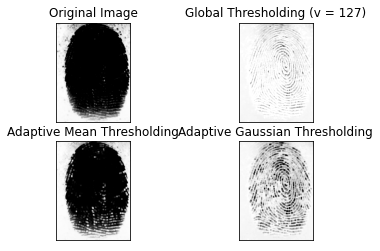

In [8]:
#img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(finger,kernel,iterations = 1)
dilation = cv2.dilate(finger,kernel,iterations = 1)
opening = cv2.morphologyEx(finger, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(finger, cv2.MORPH_CLOSE, kernel)


images = [erosion, dilation, opening, closing]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


### **Vyhladenie obrazu**

Vyhladenie obrazu alebo aj rozmazanie obrazu. Rozmazanie obrazu sa dosiahne konvolúciou obrazu pomocou kernelu (v podobe matice). Je to užitočné na odstránenie šumu. 
V skutočnosti odstraňuje vysokofrekvenčný obsah (napr.: šum, okraje) z obrazu. 
Takže okraje sú pri tejto operácii trochu rozmazané. Na rozmazanie (vyhladenie) obrazu sa používajú LPF (low-pass filter) filtre typu dolná priepusť.
OpenCV poskytuje štyri hlavné typy techník vyhladenia.

Priemerovanie
Pri priemerovaní sa používa konvolúcia obrazu a normalizovaného filtra.
Jednoducho vezmeme priemer všetkých pixelov pod oblasťou filtra a hodnotu centrálneho pixela nahradíme vypočítaným priemerom. 
Túto operáciu zopakujeme pre každý pixel.
Na to slúži funkcia cv.blur() alebo cv.boxFilter().


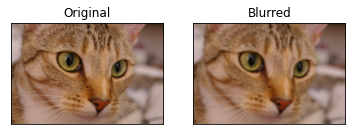

In [9]:
#img = cv2.imread('opencv-logo-white.png')
blur = cv2.blur(cat,(5,5))
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Gaussov filter

V tejto metóde sa namiesto filtra z priemerovania používa Gaussovo jadro. Vykonáva sa pomocou funkcie cv.GaussianBlur().
Gaussovský filter vezme okolie okolo pixelu a nájde jeho Gaussov vážený priemer.
Pri Gaussovom filtrovaní sa neberie do úvahy, či majú pixely podobnú intenzitu, či je pixel okrajový alebo nie, čo to rozmazáva okraje.


In [ ]:
blur = cv2.GaussianBlur(cat,(5,5),0)
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Vyhladenie pomocou mediánu

V prvom kroku sa vypočíta medián všetkých pixelov pod oknom filtra a v druhom kroku sa centrálny pixel nahradí touto hodnotou mediánu. 
Vyhladenie pomocou mediánu je vysoko účinné pri odstraňovaní šumu určitého druhu (napríklad šum salt and pepper). 
Jedna zaujímavá vec, ktorú si treba všimnúť, je, že pri gaussovoma priemerovacom filtri môžeme dostať hodnotu, 
ktorá nemusí existovať v pôvodnom obrázku. No pri mediánovom filtorvaní sa toto nemôže stať, pretože centrálny prvok je vždy nahradený nejakou hodnotou pixelu v obrázku.
Veľkosť filtra musí byť kladné a nepárne číslo.

In [ ]:
median = cv2.medianBlur(cat,5)
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Bilaterálny filter

Bilaterálny filter je vysoko účinný pri odstraňovaní šumu a zároveň zanecháva ostré hrany. Vykonanie operácie bilaterálneho filtrovania je však pomalšie v porovnaní s inými filtrami.
Bilaterálne filtrovanie používa Gaussov filter v priestore a Gaussov filter intenzity, ktorý je funkciou rozdielu pixelov.
Gaussova funkcia rozdielu intenzity zaisťuje, že pri rozmazaní sa berú do úvahy iba pixely s podobnou hodnotou intenzity ako hodnota centrálneho pixelu.
Vďaka, čomu sú zachované okraje, pretože pixely, ktoré tvoria hrany budú mať veľké rozdiely v intenzite.



In [ ]:
blur = cv2.bilateralFilter(cat,9,75,75)
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 4. Segmentácia obrazu

Segmentácia obrazu je proces rozdelenia obrazu na viaceré segmenty. Cieľom je zmeniť reprezentáciu obrazu tak, aby ho bolo jednoduchšie analyzovať.

- detekcia hrán
- zhlukovanie
- metódy založené na histograme
- region-growing algoritmus
- prahovanie

### **Detekcia hrán**

#### Cannyho hranový detektor
Cannyho hranový detektor je viacúrovňový algoritmus na detekciu hrán v akomkoľvek
vstupnom obraze. Algoritmus je založený na obraze v odtieňoch sivej, preto sa ako prerekvizita vyžaduje transformácia obrazu.
Kroky algoritmu sú nasledovné:
- Redukcia šumu pomocou Gaussovho filtra. Veľkosť filtra závisí na požadovanom rozmazaní. Čím je filter menší, tým menej bude rozmazanie viditeľné.

- Výpočet gradientov - umožňuje určiť intenzitu a smer hrán pomocou operátorov pre
detekciu hrán. Najčastejšie sa využíva Sobelov operátor.

- Non-maximum Suppression - algoritmus prechádza cez všetky body v matici gradientu
a nájde pixel s najvyššou hodnotou v smere hrany.

- Dvojité prahovanie - cieľom je, identifikovať 3 druhy pixelov: silné, slabé a nerelevantné. Silné pixely majú vysokú intenzitu a patria hrane. Nerelevantné pixely s určitosťou nie sú súčasťou hrany. Slabé body nemajú dostatočne vysokú intenzitu, aby boli
považované za body hrany a zároveň nie sú dostatočne nízke, aby boli nerelevantné.

- Finálna detekcie hrán. Pixely, ktoré sú označené ako slabé sa vyhodnotia ako silné,
ak sú susediace so silným pixelom. Inak sú považované za nerelevantné


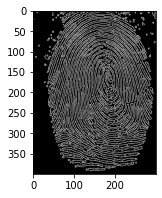

In [10]:
edge_canny = skimage.feature.canny(finger)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.imshow(edge_canny, cmap="gray")

#### Frangi filter

Frangiho filter sa zvyčajne používa na detekciu rúrkovitých štruktúr ako sú napríklad krvné cievy. 
Filter dokáže identifikovať 3 druhy štruktúr: tanierovitý, rúrkovitý a tvar kvapky. Taktiež rozoznáva tmavé štruktúri na svetlom pozadí a svetlé štruktúri na tmavom pozadí. 

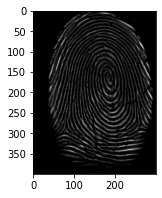

In [11]:
edge_frangi = skimage.filters.frangi(finger)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.imshow(edge_frangi, cmap="gray")

### **Zhlukovanie**
Zhlukovanie v obrazu funguje na základe intenzity jasu pixelu. Pomáha pri segmentácií objektov s podobnou farebnou škálou. Zároveň funguje ako farebná kvantizácia, vďaka ktorej sa redukuje pamäť potrebná na uloženie obrázka. 

Najčastejšie sa používa metóda k-means.

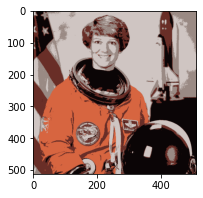

In [12]:
# zmena na 2D pole a pretypovanie na float32, ktorý požaduje kmeans metóda
image = astronaut.reshape((-1, 3))
image = np.float32(image)

# kritéria zastavenie zhlukovania: dosiahnutie maximálnej presnosti alebo maximálneho počtu iterícií 

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
k = 5
retval, labels, centers = cv2.kmeans(image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# pretypovanie naspat na povodne hodnoty
centers = np.uint8(centers)
res = centers[labels.flatten()]
res2 = res.reshape((astronaut.shape))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.imshow(res2)

### **Prahovanie**

#### Otsu prahovanie

Otsu prahovanie patrí medzi globálne prahovacie algoritmy. Základná myšlienka za touto
prahovacou metódou je rozdeliť histogram obrazu do dvoch zhlukov. Najlepšie teda pracuje
na bimodálnych obrazoch. Bimodálny obraz je taký, ktorého histograam obsahuje dva dominantné vrcholy. Otsu algoritmus sa snaží nájsť prah práve medzi týmito dvoma vrcholmi.

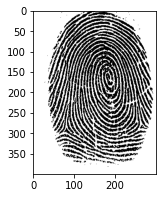

In [13]:
otsu_thresh = skimage.filters.threshold_otsu(finger)
sample_otsu = finger > otsu_thresh 


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
ax.imshow(sample_otsu, cmap="gray")

### Zdroje

https://towardsdatascience.com/image-filters-in-python-26ee938e57d2

https://scikit-image.org/skimage-tutorials/lectures/1_image_filters.html

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html

http://www.ipol.im/pub/art/2011/bcm_nlm/

https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

https://sk.wikipedia.org/wiki/Morfologick%C3%A9_oper%C3%A1cie

https://www.vut.cz/www_base/zav_prace_soubor_verejne.php?file_id=230400

https://www.vut.cz/www_base/zav_prace_soubor_verejne.php?file_id=230159
